In [2]:
import pandas as pd

In [3]:
small_tweets = pd.read_csv('./small_english_tweets.csv').drop(['Unnamed: 0', 'lang', 'country_code', 'place_full_name'], axis=1)

## Convert to datetime and rename column 'date'
small_tweets['created_at'] = pd.to_datetime(small_tweets['created_at'], errors='coerce', format="%Y-%m-%d").dt.date
small_tweets.columns = ['date', 'screen_name', 'text', 'source', 'favourites_count',
                        'retweet_count', 'followers_count', 'verified']

In [6]:
## Converting verified column to 1's and 0's
small_tweets['verified'] = small_tweets['verified'].replace(to_replace=True, value=1)

In [7]:
small_tweets.head()

,date,screen_name,text,source,favourites_count,retweet_count,followers_count,verified
0,2020-03-26,AnnaKealan,hoping for more contagious #love after this st...,Twitter for iPhone,0.0,0.0,10.0,0.0
1,2020-03-12,DrPaulRLong1,Is Trump even consulting with his experts? The...,Twitter for iPhone,51.0,1.0,6.0,0.0
2,2020-03-21,Sakthi_match,#coronavirus #Covid_19 #workingfromhome #WorkF...,Twitter for iPhone,41.0,0.0,61.0,0.0
3,2020-03-25,Agarwal_b_mohit,Reason for Corona Outbreak #coronovirusoutbrea...,Instagram,1.0,0.0,11.0,0.0
4,2020-03-18,DavidKatee,During this period of #Covid_19 you will to kn...,Twitter for iPhone,10345.0,1.0,989.0,0.0


In [77]:
## country code and place full name have a lot of NaN values
small_tweets.isnull().sum()

date                0
screen_name         0
text                0
source              0
favourites_count    0
retweet_count       0
followers_count     0
verified            0
dtype: int64

In [78]:
words = []
for i in range (len(small_tweets)):
    tweet = list(small_tweets.iloc[i,2].split())
    for x in range (len(tweet)):
        words.append(tweet[x].lower())
######################################### Below is getting Stopwords.
#import nltk
from nltk.corpus import stopwords
#nltk.download('stopwords')
stopWords = set(stopwords.words('english'))
Extra_StopWords = ['#coronavirusoutbreak','#coronavirus','#coronavirus','#covid19','#coronaalert','#covid_19','coronavirus','#covidー19','#covid2019','-','virus','#covid'
,'get','like','total','#coronvirus','#coronavirusupdate','#coronaoutbreak','#coronavirusoutbreak.','corona','#corona','.','#coronavirusupdates','it’s']

#######################
def get_word_counts(words):
    """
    return sorted (word, count) list, sort by count
    """
    word_count_dict = {}
    for word in words:
                if word in list(stopWords):
                    continue
                if word in list(Extra_StopWords):
                    continue
                if word not in word_count_dict:
                    word_count_dict[word] = 0
                word_count_dict[word] += 1
    
    sorted_word_counts = sorted(word_count_dict.items(), key = lambda kv:kv[1], reverse = True)
    return sorted_word_counts
#%%
word_counts = get_word_counts(words)
for word, count in word_counts[:50]:
    print(word, count)

cases 903
people 801
&amp; 673
new 550
us 448
confirmed 437
#coronavirusindia 431
@realdonaldtrump 392
#coronavirusinindia 378
health 370
china 332
spread 324
due 293
need 291
trump 283
know 278
time 278
world 269
take 268
deaths 268
one 259
#china 241
going 234
would 227
death 217
please 217
hands 216
stay 208
first 207
think 203
good 203
stop 202
help 193
don’t 192
hand 192
#coronavirususa 190
via 187
still 186
even 184
news 184
live 183
go 183
global 181
outbreak 178
wash 177
#coronavirusseattle 176
many 175
could 173
see 169
#covid19india 165


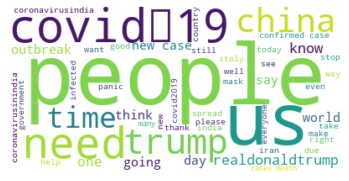

In [79]:
import matplotlib.pyplot as plt
from wordcloud import WordCloud, STOPWORDS

text = ' '.join(words)
text = text.lower()
stopwords = set(STOPWORDS)
stopwords.update(["https",'amp','corona','covid','covid19','covid_19','covid[]]19','coronvirus','coronavirusupdate',"coronavirus", "coronavirusoutbreak", "virus", "coronaalert", 'co'])
stopwords.update(stopWords)
stopwords.update(Extra_StopWords)
wordcloud = WordCloud(max_words=50,background_color="white",stopwords=stopwords).generate(text)

# Display the generated image:
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()